In [1]:
%matplotlib inline
import sys
from collections import defaultdict

if "../" not in sys.path:
    sys.path.append("../")
    
import numpy as np
from lib.envs.blackjack import BlackjackEnv
from lib.utils.draw import show_value_function,show_policy_black
import matplotlib

matplotlib.style.use('ggplot')
env = BlackjackEnv()

In [2]:
def get_policy(Q,nA):
    """
        
    """
    def policy_fn(observation):
        A = np.zeros(nA, dtype=float)
        best_action = np.argmax(Q[observation])
        A[best_action] = 1.0
        return A
    return policy_fn

In [3]:
def mc_exploring_starts(env,num_episodes,gamma=1.0):
    returns_num = defaultdict(float)
    returns_count = defaultdict(float)
    
    # 设置 map, value 的默认值为 [0,0]
    Q = defaultdict(lambda: np.zeros(env.nA))
    
    policy = get_policy(Q,env.nA)
    
    for i_episode in range(num_episodes):
        if i_episode % 1000 == 0:
            # \r 实现动态更新
            print(f"\rEpisode :{i_episode/num_episodes * 100:.2f}%",end = "")
            sys.stdout.flush()
            
        stack_state_action = []
        stack_reward = []
        state = env.reset()
        # 第一次随机选择动作
        while True:

            probs = policy(state)
            action = np.random.choice( np.arange(len(probs)),p = probs )
            

            next_state, reward, done, _ = env.step(action)
            stack_state_action.append( (state,action) )
            stack_reward.append(reward)
            if done:
                break
            state = next_state
        
        size = len(stack_reward)
        G = 0
        for i in range(size-1,-1,-1):
            state, action = stack_state_action[i]
            state = tuple(state)
            key = (state, action)
            
            G = gamma * G + stack_reward[i]
            if stack_state_action[i] not in stack_state_action[0:i]:
                returns_num[key] += G
                returns_count[key] += 1.0
                Q[state][action] = returns_num[key] / returns_count[key]
    return Q,policy

In [4]:
Q, policy = mc_exploring_starts(env,num_episodes=10000,gamma=0.9)

Episode :90.00%

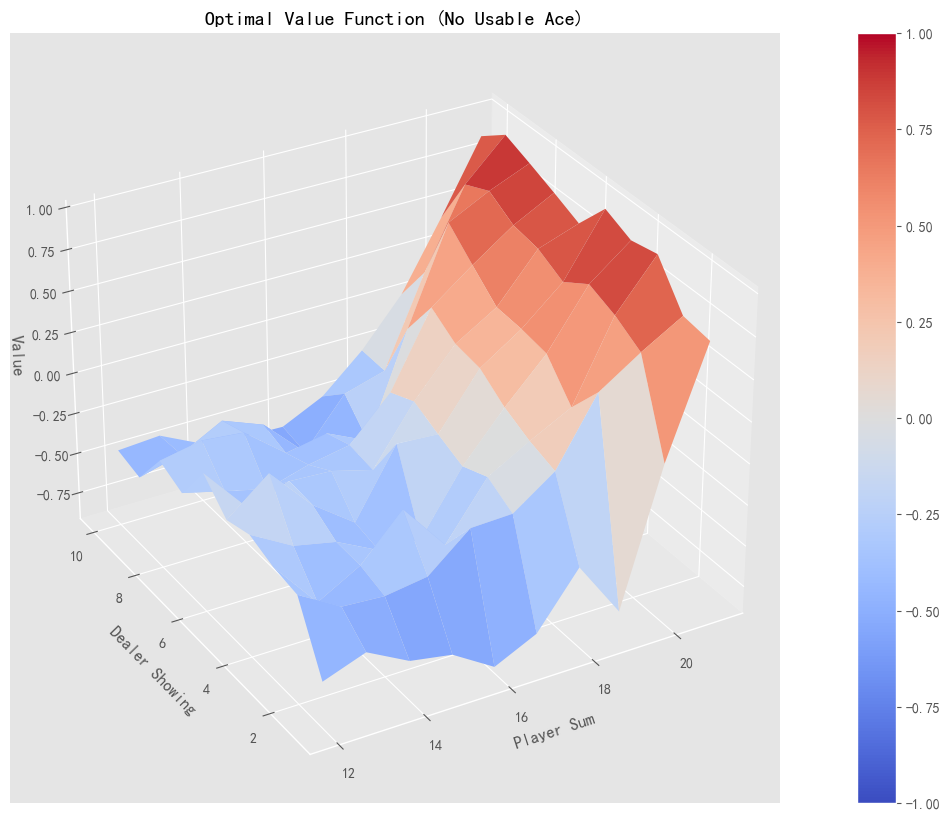

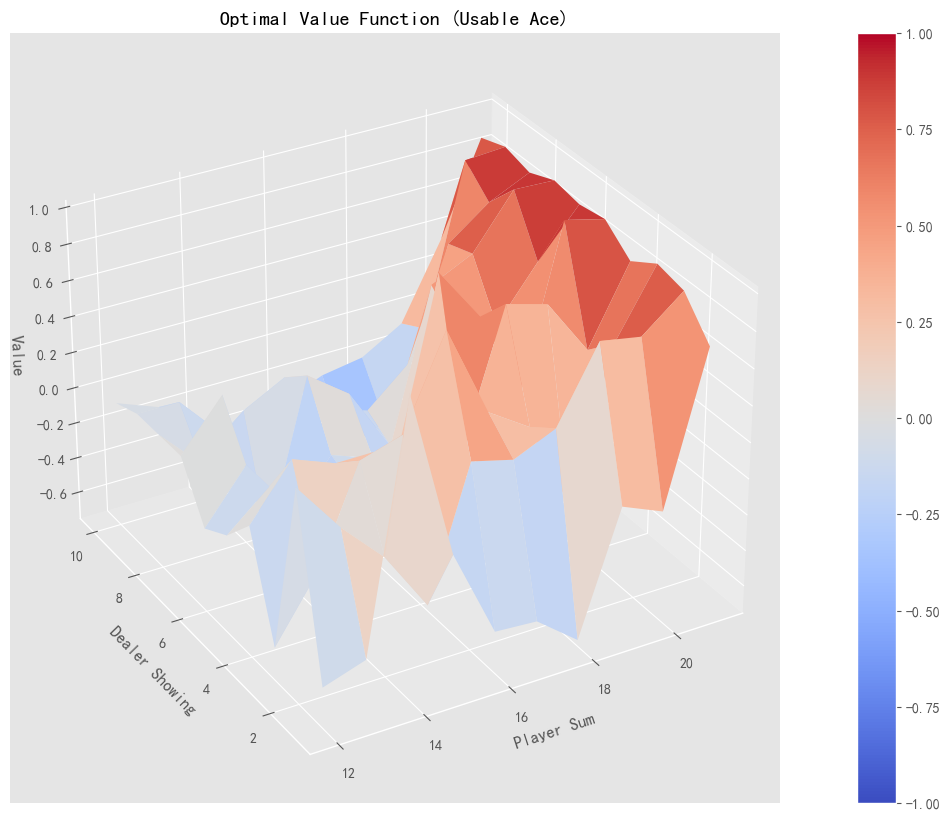

In [5]:
V = defaultdict(float)
for state, actions in Q.items():
    action_value = np.max(actions)
    V[state] = action_value
show_value_function(V, title="Optimal Value Function")

12 1 21 10


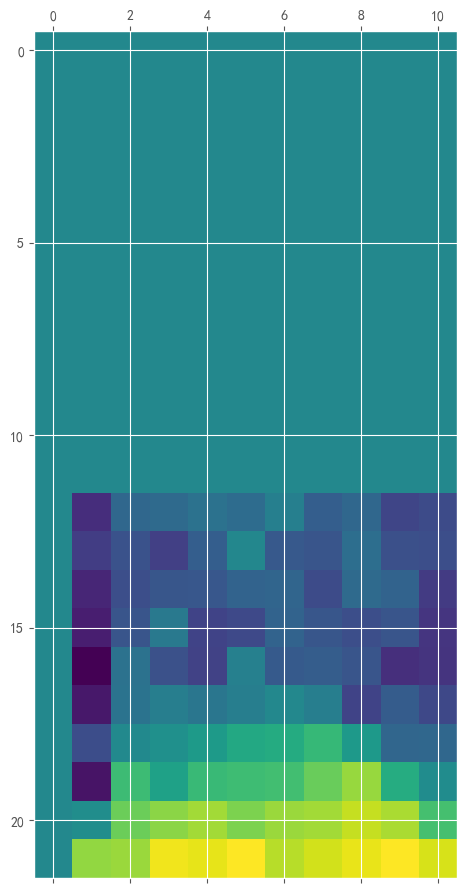

In [6]:
show_policy_black(V)